# 鐵達尼(Titanic)資料集

### 載入資料

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import datasets ## Get dataset from sklearn
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('clean_data.csv')
# df = pd.read_csv('s_Titanic.csv')

In [2]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,2.696970,0.523008,0.381594,32.204208,0.602694,0.362514
std,0.486592,0.836071,0.477990,1.191818,1.102743,0.806057,49.693429,0.489615,0.635917
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,1.000000,3.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,5.000000,8.000000,6.000000,512.329200,1.000000,2.000000


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,0,3,1,2,1,0,7.2500,1,0
1,1,1,0,4,1,0,71.2833,0,1
2,1,3,0,3,0,0,7.9250,0,0
3,1,1,0,3,1,0,53.1000,0,0
4,0,3,1,3,0,0,8.0500,1,0


In [4]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
dtype: int64

## EDA

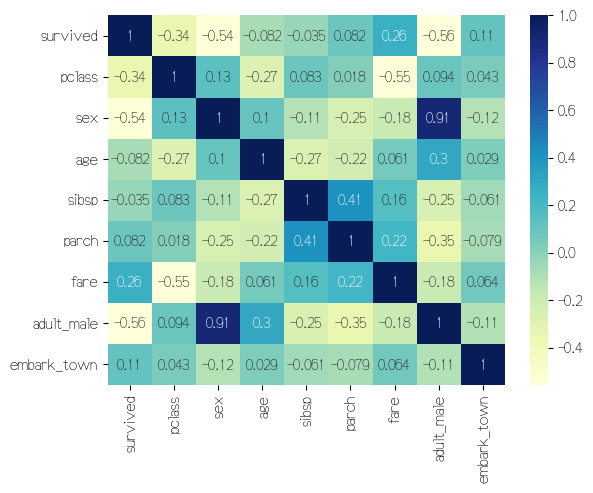

In [5]:
import seaborn as sns
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True);

pclass


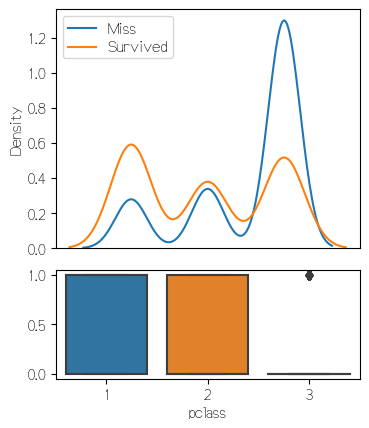

sex


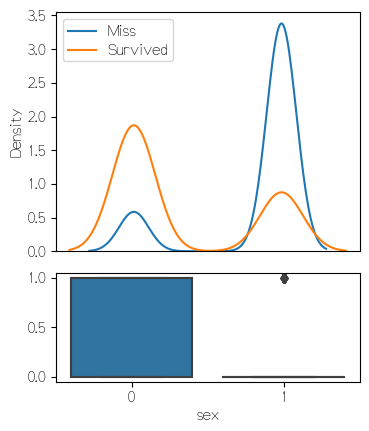

age


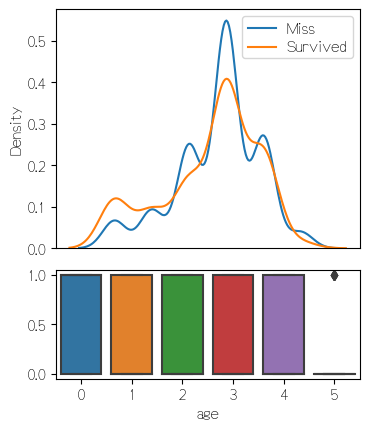

sibsp


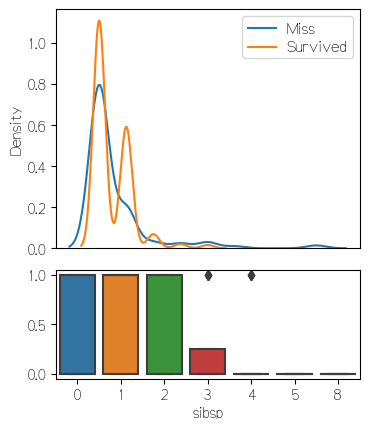

parch


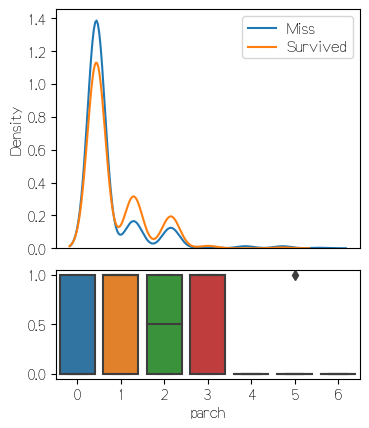

fare


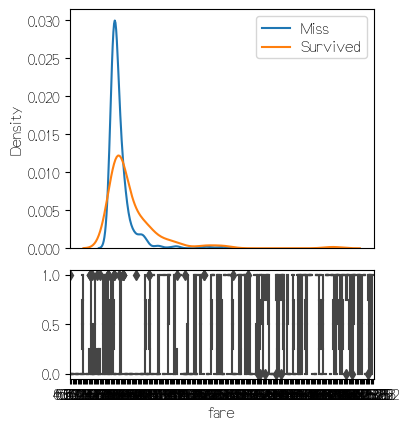

adult_male


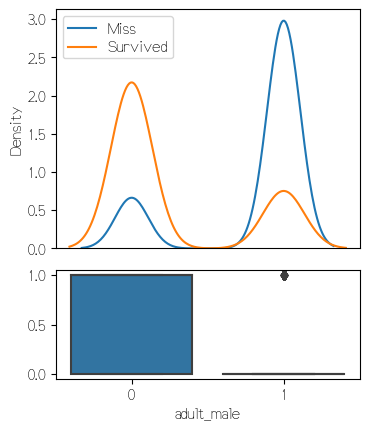

embark_town


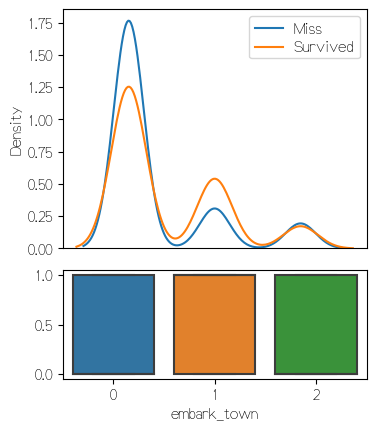

In [6]:
import matplotlib.gridspec as gridspec
for feature in df.loc[:,df.columns!='survived'].columns:
    print(feature)
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='survived',data=df,ax=ax2)
    sns.kdeplot(df[feature][df.survived==0],ax=ax1,label='Miss')
    sns.kdeplot(df[feature][df.survived==1],ax=ax1,label='Survived')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    ax1.legend()
    plt.show()

## 資料分割

In [7]:
X = df.drop('survived', axis=1)
Y = df.survived
X.head()

,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,3,1,2,1,0,7.2500,1,0
1,1,0,4,1,0,71.2833,0,1
2,3,0,3,0,0,7.9250,0,0
3,1,0,3,1,0,53.1000,0,0
4,3,1,3,0,0,8.0500,1,0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(712, 8)
(179, 8)


## 模型選擇

In [9]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [10]:
from sklearn.metrics import accuracy_score
predict=clf.predict(X_train)
accuracy = accuracy_score(Y_train, predict)
accuracy

0.8286516853932584

In [11]:
predict=clf.predict(X_test)
accuracy = accuracy_score(Y_test, predict)
accuracy

0.8212290502793296

In [12]:
from sklearn.metrics import classification_report
predict=clf.predict(X_train)
report = classification_report(Y_train, predict)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       439
           1       0.80      0.73      0.77       273

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712



In [13]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))
models.append(("XGBoost:",xgb.XGBClassifier()))

print('Models appended...')

Models appended...


## K Fold cross validation (K折交叉驗證法)

In [14]:
results = []
names = []
for name,model in models:
    # kfold = KFold(n_splits=10)  #  k-fold cross validation 分成10份
    kfold = StratifiedKFold(n_splits=10).split(X_train,Y_train) # 按母體比例切割
    cv_result = cross_val_score(model,X_train,Y_train.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(f'{names[i]:30s}：{results[i].mean()*100:.2f}')

Logistic Regression:          ：82.60
Naive Bayes:                  ：81.19
K-Nearest Neighbour:          ：74.99
Decision Tree:                ：79.08
Support Vector Machine-linear:：81.89
Support Vector Machine-rbf:   ：65.31
Random Forest:                ：78.38
eXtreme Gradient Boost:       ：81.89
MLP:                          ：65.44
AdaBoostClassifier:           ：82.45
GradientBoostingClassifier:   ：82.31
XGBoost:                      ：81.89


## GridSearchCV 模型組合

In [15]:
dict_classifiers = {
    "Logistic Regression": 
            {'classifier': LogisticRegression(),
                'params' : [
                            {
                             'penalty': ['l1','l2'],
                             'C': [0.001,0.01,0.1,1,10,100,1000]
                            }
                           ],
                'plot': 1
            },
    "Nearest Neighbors": 
            {'classifier': KNeighborsClassifier(),
                'params': [
                            {
                            'n_neighbors': [1, 3, 5, 10],
                            'leaf_size': [3, 30]
                            }
                           ],
                'plot': 1
            },

    "Gradient Boosting Classifier": 
            {'classifier': GradientBoostingClassifier(),
                 'params': [
                            {
                             'learning_rate': [0.05, 0.1],
                             'n_estimators' :[50, 100, 200],
                             'max_depth':[3,None]
                            }
                           ],
                'plot': 0
            },
    "Decision Tree":
            {'classifier': DecisionTreeClassifier(),
                 'params': [
                            {
                             'max_depth':[3,None]
                            }
                             ],
                'plot': 1
            },
    "Random Forest": 
            {'classifier': RandomForestClassifier(),
                 'params': [{'n_estimators':[10,50]}],
                'plot': 1
            },
    "Naive Bayes": 
            {'classifier': GaussianNB(),
                 'params': {},
                 'plot': 1
            },
    "XGBoost": 
            {'classifier': xgb.XGBClassifier(),
                 'params': [
                     {'n_estimators': [50, 100, 150, 200],
                        'max_depth': [4, 8, 12],
                        'learning_rate': [0.05, 0.1, 0.15]}     
                        ],
                 'plot': 1
            },            
    "AdaBoostClassifier": 
            {'classifier': AdaBoostClassifier(),
                 'params': [
                     {'n_estimators': [50, 100, 150, 200],
                    'learning_rate': [0.05, 0.1, 0.15]}  
                            ],
                 'plot': 1
            }       
       
}

### 繪製學習曲線

In [16]:
from sklearn.model_selection import learning_curve 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.6, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### GridSearchCV 

In [17]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
num_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(
        data=np.zeros(shape=(num_classifiers,4)),
        columns = ['classifier',
                   'train_score', 
                   'test_score',
                   'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        print(f"trained {key}",end='')
        grid = GridSearchCV(classifier['classifier'], 
                      classifier['params'],
                      refit=True,
                        cv = 10, # 9+1
                        scoring = 'accuracy', # scoring metric
                        n_jobs = -1
                        )
        estimator = grid.fit(X_train,
                             Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = estimator.score(X_train,
                                      Y_train)
        test_score = estimator.score(X_test,
                                     Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print(f" in {t_diff:.2f} s")
        count+=1
        if classifier['plot']:
            plot_learning_curve(estimator, 
                                "{}".format(key),
                                X_train,
                                Y_train,
                                ylim=(0.5,1.0),
                                cv=10)
    return df_results

trained Logistic Regression in 0.39 s
trained Nearest Neighbors in 0.02 s
trained Gradient Boosting Classifier in 0.28 s
trained Decision Tree in 0.02 s
trained Random Forest in 0.06 s
trained Naive Bayes in 0.00 s
trained XGBoost in 0.69 s
trained AdaBoostClassifier in 0.36 s


,classifier,train_score,test_score,training_time
4,Random Forest,0.943820,0.826816,0.062500
0,Logistic Regression,0.828652,0.821229,0.390625
3,Decision Tree,0.834270,0.821229,0.015625
2,Gradient Boosting Classifier,0.844101,0.815642,0.281250
7,AdaBoostClassifier,0.831461,0.815642,0.359375
6,XGBoost,0.856742,0.810056,0.687500
5,Naive Bayes,0.813202,0.804469,0.000000
1,Nearest Neighbors,0.856742,0.743017,0.015625


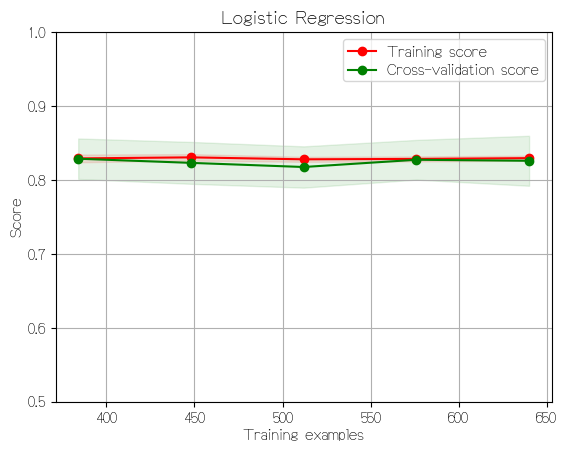

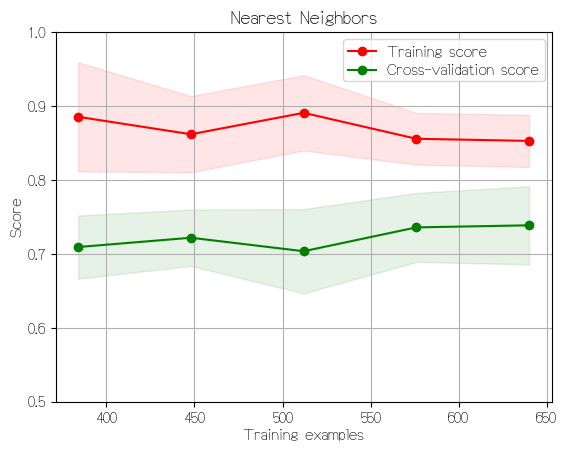

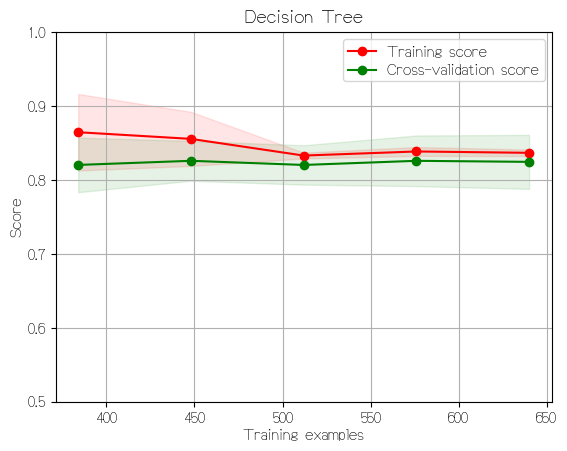

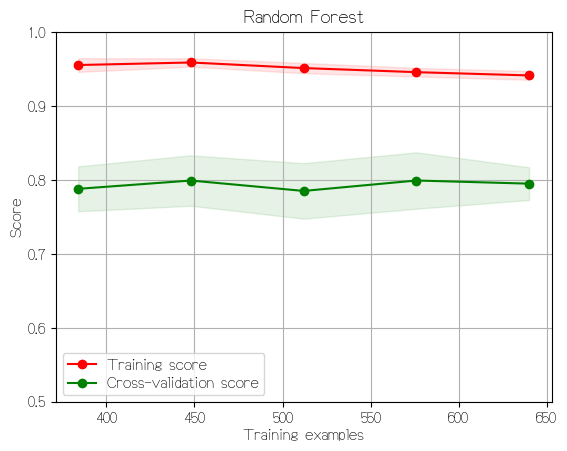

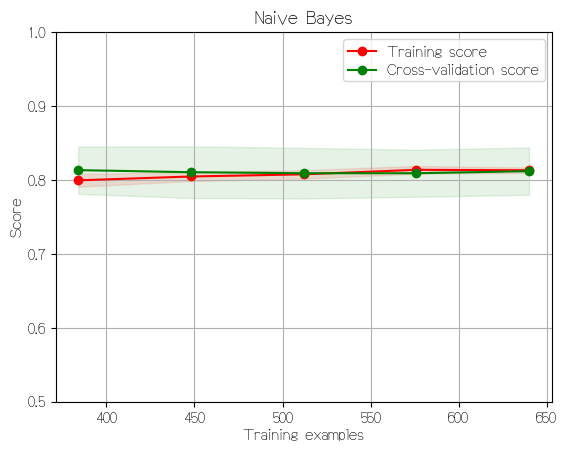

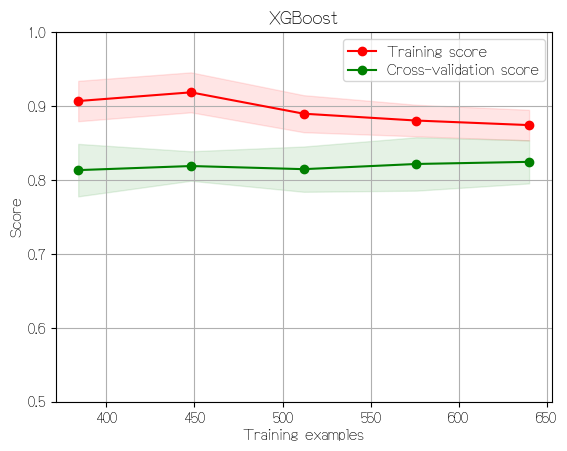

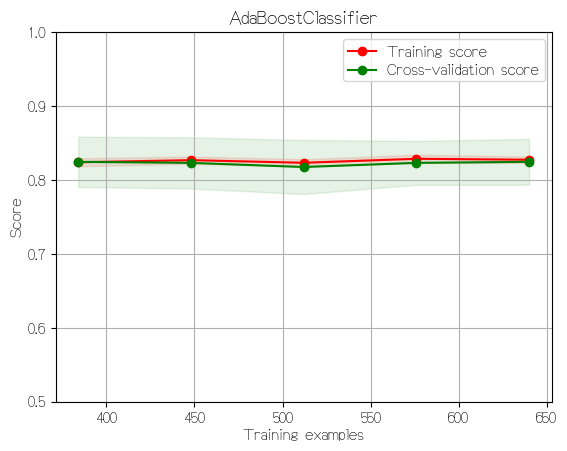

In [18]:
df_results = batch_classify(X_train, Y_train, X_test, Y_test)
display(df_results.sort_values(by='test_score', ascending=False))

### 取最佳模型（Logistic Regression）重新進行管道測試

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        LogisticRegression())
pipe_lr.fit(X_train, Y_train)
print(f'R2={pipe_lr.score(X_test, Y_test)}')

R2=0.8100558659217877


### 管線結合K折交叉驗證

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_test,
                         y=Y_test,
                         cv=10,
                         n_jobs=-1)
print(f'K折分數: %s' % scores)
print(f'平均值: {np.mean(scores):.3f}, 標準差: {np.std(scores):.3f}')

K折分數: [0.83333333 0.88888889 0.83333333 0.61111111 0.77777778 0.77777778
 0.83333333 0.72222222 0.66666667 0.94117647]
平均值: 0.789, 標準差: 0.095


In [22]:
# penalty = ('l1','l2')
C = (0.001,0.01,0.1,1,10,100,1000)
# tuned_parameters = [{'penalty': penalty,'C': C}]
tuned_parameters = [{'C': C}]
# 效能調校
# clf = GridSearchCV(pipe_lr, tuned_parameters, cv=5, refit=False, n_jobs=-1)

clf = GridSearchCV(LogisticRegression(), 
                tuned_parameters,
                refit=True,
                cv = 10, 
                n_jobs = -1
                )
clf.fit(X_test, Y_test)
scores_mean = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
print('平均分數:\n', scores_mean, '\n標準差:\n', scores_std)


平均分數:
 [0.72679739 0.71568627 0.79901961 0.81045752 0.79934641 0.78823529
 0.79379085] 
標準差:
 [0.08652667 0.09327189 0.07498202 0.07873037 0.08964261 0.10997885
 0.09893329]


In [23]:
clf.best_params_

{'C': 1}

In [24]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=5),
                        LogisticRegression(C=clf.best_params_['C']))
pipe_lr.fit(X_train, Y_train)
pipe_lr.score(X_test, Y_test)

0.8100558659217877

In [25]:
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scaler', StandardScaler()),
                    ('pca', PCA(n_components=5)),
                    ('LogisticRegression', LogisticRegression(C=clf.best_params_['C']))])
pipe_lr.fit(X_train, Y_train)
pipe_lr.score(X_test, Y_test)

0.8100558659217877